In [1]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
)
import os
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import math

In [2]:
%load_ext lab_black

# Extra plots

In [7]:
with open(
    "../fixedcells_4_merged/cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus.pkl",
    "rb",
) as f:
    cto = pickle.load(f)

In [8]:
cto.cell_data

cisTopic_log_nr_frag  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...             3.436481   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...             3.295567   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...             3.398287   
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXED...             3.845284   
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXED...             3.206286   
...                                                                 ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS                   3.738543   
CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS                   3.416308   
GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS                    3.26031   
CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS                   3.425371   
ACCTCGTTGAGTTGAA___MDC_mtscatac_1.FIXEDCELLS                   3.294466   

                                                   cisTopic_nr_frag  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...             2732   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...             1975   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...             2502   
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXED...             7003   
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXED...             1608   
...                                                             ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS                   5477   
CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS                   2608   
GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS                   1821   
CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS                   2663   
ACCTCGTTGAGTTGAA___MDC_mtscatac_1.FIXEDCELLS                   1970   

                                                   cisTopic_log_nr_acc  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...            3.321598   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...             2.93852   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...            3.242541   
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXED...            3.750431   
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXED...            3.068928   
...                                                                ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS                  3.263873   
CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS                  2.569374   
GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS                  3.084934   
CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS                  2.921686   
ACCTCGTTGAGTTGAA___MDC_mtscatac_1.FIXEDCELLS                  2.884229   

                                                   cisTopic_nr_acc  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...            2097   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...             868   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...            1748   
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXED...            5629   
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXED...            1172   
...                                                            ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS                  1836   
CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS                   371   
GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS                  1216   
CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS                   835   
ACCTCGTTGAGTTGAA___MDC_mtscatac_1.FIXEDCELLS                   766   

                                                    Log_total_nr_frag  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...           4.540492   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...           4.001474   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...           4.226136   
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXED...           4.480108   
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXED...           3.818688   
...                                                               ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS            

In [11]:
cto.cell_data["tech_alias"] = [tech_alias_dict[x] for x in cto.cell_data["tech"]]

In [12]:
cto.selected_model.cell_topic

TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXEDCELLS  \
Topic1                                            0.028916      
Topic2                                            0.014012      
Topic3                                            0.002833      
Topic4                                            0.077356      
Topic5                                            0.014943      
Topic6                                            0.072233      
Topic7                                            0.048478      
Topic8                                            0.012615      
Topic9                                            0.002833      
Topic10                                           0.034506      
Topic11                                           0.040095      
Topic12                                           0.005162      
Topic13                                           0.119741      
Topic14                                           0.007491      
Topic15                                           0.057794      
Topic16                                           0.013080      
Topic17                                           0.048944      
Topic18                                           0.002368      
Topic19                                           0.055465      
Topic20                                           0.003299      
Topic21                                           0.010286      
Topic22                                           0.273909      
Topic23                                           0.044287      
Topic24                                           0.009354      

         ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXEDCELLS  \
Topic1                                            0.013163      
Topic2                                            0.042574      
Topic3                                            0.022967      
Topic4                                            0.008805      
Topic5                                            0.010984      
Topic6                                            0.027324      
Topic7                                            0.028413      
Topic8                                            0.139524      
Topic9                                            0.048021      
Topic10                                           0.176561      
Topic11                                           0.060004      
Topic12                                           0.006627      
Topic13                                           0.007716      
Topic14                                           0.016431      
Topic15                                           0.015341      
Topic16                                           0.003359      
Topic17                                           0.052378      
Topic18                                           0.010984      
Topic19                                           0.016431      
Topic20                                           0.020788      
Topic21                                           0.014252      
Topic22                                           0.149328      
Topic23                                           0.095951      
Topic24                                           0.012073      

         GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXEDCELLS  \
Topic1                                            0.039535      
Topic2                                            0.018956      
Topic3                                            0.005608      
Topic4                                            0.179690      
Topic5                                            0.016175      
Topic6                                            0.081248      
Topic7                                            0.052883      
Topic8                                            0.053439      
Topic9                                            0.022293      
Topic10                                           0.014507      
Topic11                                   

In [ ]:
plot_topic(
    cto, reduction_name="UMAP", target="cell", num_columns=3, save="plots_qc/topics.png"
)


KeyboardInterrupt



# plot basic stuff

In [212]:
for key in cto.projections["cell"].keys():
    print(key)
    cto.add_cell_data(cto.projections["cell"][key])

NameError: name 'cto' is not defined

In [213]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [214]:
tech_alias_dict = {
    "10xmultiome": "10x MO",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

In [216]:
tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [217]:
tech_alias_color_palette

{'10x v2': '#1b9e77',
 '10x v1': '#d95f02',
 '10x v1.1': '#7570b3',
 '10x MO': '#e7298a',
 'mtscATAC-seq': '#66a61e',
 'ddSEQ SureCell': '#e6ab02',
 's3-ATAC': '#a6761d',
 'HyDrop': '#666666'}

In [ ]:
import palettable

In [ ]:
cell_type_color_palette = palettable.cartocolors.qualitative.Safe_7.mpl_colors

In [ ]:
cell_type_color_palette = palettable.cartocolors.qualitative.Safe_7.mpl_colors

In [ ]:
df = cto.cell_data
x_var = "tSNE_1"
y_var = "tSNE_2"
color_var = "tech_alias"

plot_dimreduc(
    df, x_var=x_var, y_var=y_var, color_var=color_var, palette=tech_alias_color_palette
)
plt.legend(loc=(1.10, 0))
plt.savefig(f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.png", dpi=600)

In [ ]:
df = cto.cell_data
x_var = "Unique_nr_frag"
x_axis_scale = "log"
y_var = "TSS_enrichment"
y_axis_scale = "linear"
color_var = "tech"

plot_metadata(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    x_axis_scale=x_axis_scale,
    y_axis_scale=y_axis_scale,
)

# harmony

In [ ]:
from pycisTopic.clust_vis import harmony

In [ ]:
cto.cell_data.columns

In [ ]:
harmony(cto, "sample_id", random_state=555, max_iter_harmony=20)

In [ ]:
run_umap(cto, target="cell", reduction_name="UMAP_harmony_by_sample_id", harmony=True)

In [ ]:
run_tsne(cto, target="cell", reduction_name="tSNE_harmony_by_sample_id", harmony=True)

In [ ]:
for key in cto.projections["cell"].keys():
    print(key)
    for dim in cto.projections["cell"][key].columns:
        cto.cell_data[dim + "_" + key] = cto.projections["cell"][key][dim]

In [ ]:
cto.cell_data

In [ ]:
cto

In [ ]:
df = cto.cell_data
x_var = "tSNE_1_tSNE_harmony_by_sample_id"
y_var = "tSNE_2_tSNE_harmony_by_sample_id"
color_var = "seurat_cell_type"

plot_dimreduc(
    df, x_var=x_var, y_var=y_var, color_var=color_var, palette=cell_type_color_palette
)

In [ ]:
df = cto.cell_data
x_var = "tSNE_1_tSNE_harmony_by_sample_id"
y_var = "tSNE_2_tSNE_harmony_by_sample_id"
color_var = "seurat_cell_type"

plot_dimreduc(df, x_var=x_var, y_var=y_var, color_var=color_var)

In [ ]:
df = cto.cell_data
x_var = "UMAP_1"
y_var = "UMAP_2"
color_var = "sample_id"

plot_dimreduc(df, x_var=x_var, y_var=y_var, color_var=color_var)

In [ ]:
df = cto.cell_data
x_var = "UMAP_1_UMAP_harmony_by_sample_id"
y_var = "UMAP_2_UMAP_harmony_by_sample_id"
color_var = "tech"

plot_dimreduc(df, x_var=x_var, y_var=y_var, color_var=color_var)

In [ ]:
cto.cell_data.columns

In [ ]:
df = cto.cell_data
x_var = "UMAP_1_UMAP_harmony_by_sample_id"
y_var = "UMAP_2_UMAP_harmony_by_sample_id"
color_var = "Doublet_scores_fragments"

plot_dimreduc(df, x_var=x_var, y_var=y_var, color_var=color_var)

In [ ]:
df = cto.cell_data
x_var = "UMAP_1_UMAP_harmony_by_sample_id"
y_var = "UMAP_2_UMAP_harmony_by_sample_id"
color_var = "seurat_cell_type"

plot_dimreduc(df, x_var=x_var, y_var=y_var, color_var=color_var)

In [ ]:
df = cto.cell_data
x_var = "UMAP_1"
y_var = "UMAP_2"
color_var = "tech"

plot_dimreduc(df, x_var=x_var, y_var=y_var, color_var=color_var)

In [ ]:
df = cto.cell_data
x_var = "UMAP_1"
y_var = "UMAP_2"
color_var = "tech"

plot_dimreduc(df, x_var=x_var, y_var=y_var, color_var=color_var)

In [ ]:
df = cto.cell_data
x_var = "tSNE_1_tSNE_harmony_by_sample_id"
y_var = "tSNE_2_tSNE_harmony_by_sample_id"
color_var = "tech"

plot_dimreduc(df, x_var=x_var, y_var=y_var, color_var=color_var)

In [ ]:
df

In [ ]:
cto.cell_data.to_csv("fixedcells_cto_merged.tsv", sep="\t")

# Start here

In [3]:
df = pd.read_csv("fixedcells_cto_merged.tsv", sep="\t")

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_dimreduc(
    df,
    x_var="tSNE_1",
    y_var="tSNE_2",
    color_var=None,
    palette=None,
    figsize=(10, 10),
    ax=None,
):
    # initialize ax
    if ax == None:
        fig, ax = plt.subplots(figsize=figsize)

    # actually plot
    sns.scatterplot(
        data=df,
        x=x_var,
        y=y_var,
        s=1,
        ax=ax,
        hue=color_var,
        linewidth=0,
        palette=palette,
    )
    sns.despine(ax=ax, left=False, right=True, top=True, bottom=False)

    # some finetuning of figure
    ax.set(xticklabels=[], yticklabels=[])
    ax.set(xlabel=None, ylabel=None)  # remove the y-axis label
    ax.tick_params(left=False, bottom=False)

# Palettes

In [13]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [14]:
tech_alias_dict = {
    "10xmultiome": "10x MO",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

In [15]:
tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [16]:
import palettable

In [17]:
cell_type_alias = {
    "Cytotoxic T cell": "Cytotoxic T cell",
    "CD4+ T cell": "Naive T cell",
    "CD14+ monocyte": "CD14+ monocyte",
    "B cell": "B cell",
    "Natural killer cell": "Natural killer cell",
    "CD16+ monocyte": "CD16+ monocyte",
    "Dendritic cell": "Dendritic cell",
}

In [18]:
reference_df = pd.read_csv(
    "/lustre1/project/stg_00090/scatac_benchmark/0_resources/seurat_references/pbmc_ssc_mat__integrated.tsv",
    sep="\t",
    header=None,
    index_col=0,
    names=["cell_type"],
)

In [19]:
reference_df.value_counts()

cell_type          
Cytotoxic T cell       8692
CD4+ T cell            7299
CD14+ monocyte         4949
B cell                 4850
Natural killer cell    1565
CD16+ monocyte          794
Dendritic cell          411
dtype: int64

In [20]:
cell_type_order = list(reference_df["cell_type"].value_counts().index)

In [21]:
cell_type_colors = palettable.cartocolors.qualitative.Safe_7.mpl_colors

In [22]:
cell_type_color_palette = {
    x: cell_type_colors[cell_type_order.index(x)] for x in cell_type_order
}

In [23]:
cell_type_color_palette

{'Cytotoxic T cell': (0.5333333333333333, 0.8, 0.9333333333333333),
 'CD4+ T cell': (0.8, 0.4, 0.4666666666666667),
 'CD14+ monocyte': (0.8666666666666667, 0.8, 0.4666666666666667),
 'B cell': (0.06666666666666667, 0.4666666666666667, 0.2),
 'Natural killer cell': (0.2, 0.13333333333333333, 0.5333333333333333),
 'CD16+ monocyte': (0.6666666666666666, 0.26666666666666666, 0.6),
 'Dendritic cell': (0.26666666666666666, 0.6666666666666666, 0.6)}

In [24]:
palettes_dict = {
    "tech_alias": tech_alias_color_palette,
    "seurat_cell_type": cell_type_color_palette,
    "consensus_cell_type": cell_type_color_palette,
}

# plot them

In [25]:
df["tech_alias"] = [tech_alias_dict[x] for x in df["tech"]]

In [26]:
plt.rcParams["font.weight"] = "bold"

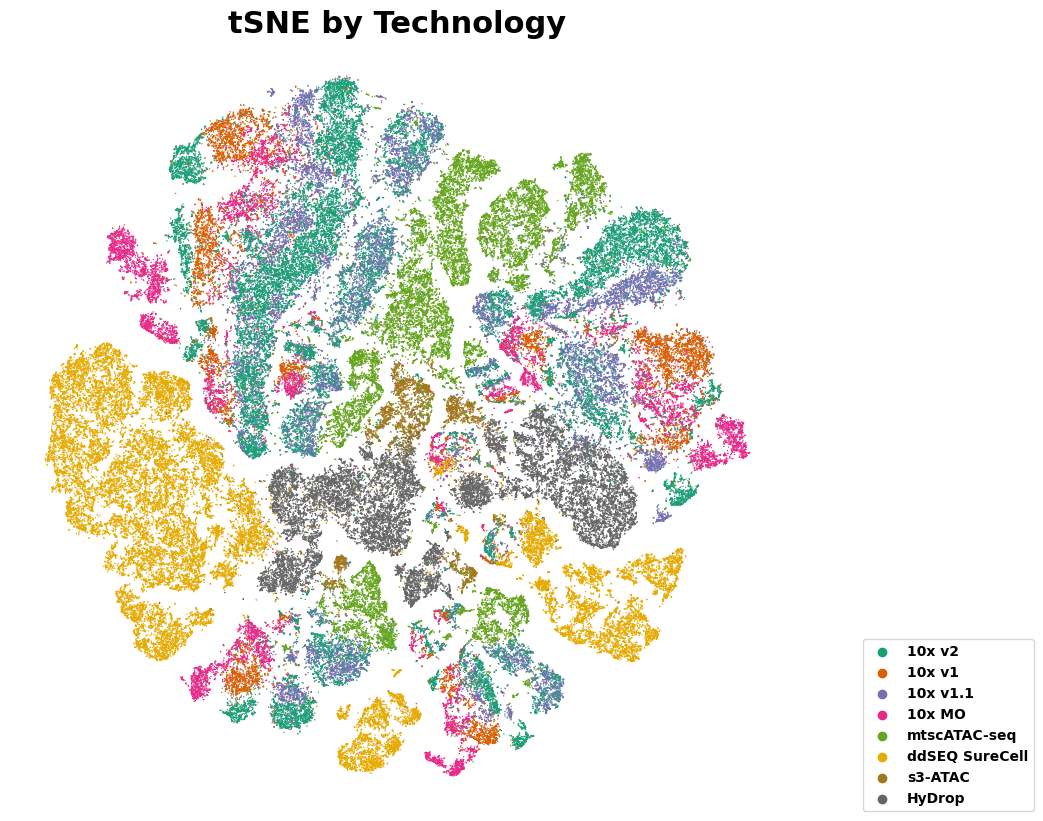

In [20]:
x_var = "tSNE_1"
y_var = "tSNE_2"
color_var = "tech_alias"

plot_dimreduc(
    df, x_var=x_var, y_var=y_var, color_var=color_var, palette=palettes_dict[color_var]
)
handles, labels = plt.gca().get_legend_handles_labels()

legend_order = list(palettes_dict[color_var].keys())
legend_order_index = [labels.index(x) for x in legend_order]

plt.legend(
    [handles[i] for i in legend_order_index],
    [labels[i] for i in legend_order_index],
    loc=(1.10, 0),
)
sns.despine(bottom=True, left=True)
plt.title("tSNE by Technology", fontsize=22, fontweight="bold")

plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.png",
    dpi=600,
    bbox_inches="tight",
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.svg",
    dpi=600,
    bbox_inches="tight",
)

In [38]:
import pandas as pd

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'cisTopic_log_nr_frag',
       'cisTopic_nr_frag', 'cisTopic_log_nr_acc', 'cisTopic_nr_acc',
       'Log_total_nr_frag', 'Log_unique_nr_frag', 'Total_nr_frag',
       'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'barcode', 'Doublet_scores_fragments',
       'Predicted_doublets_fragments', 'fmx_droplet_type', 'fmx_sample',
       'pycisTopic_leiden_10_3.0', 'tech', 'centre_tech',
       'Log_unique_nr_frag_in_regions', 'consensus_cell_type_individual',
       'seurat_cell_type_pred_score', 'seurat_cell_type',
       'consensus_cell_type', 'UMAP_1', 'UMAP_2', 'tSNE_1', 'tSNE_2',
       'UMAP_1_UMAP', 'UMAP_2_UMAP', 'tSNE_1_tSNE', 'tSNE_2_tSNE',
       'UMAP_1_UMAP_harmony_by_sample_id', 'UMAP_2_UMAP_harmony_by_sample_id',
       'tSNE_1_tSNE_harmony_by_sample_id', 'tSNE_2_tSNE_harmony_by_sample_id',
       'tech_alias'],
      dtype='object'

In [32]:
df["fmx_sample"] = df["fmx_sample"].fillna("Patient C")

In [33]:
df["fmx_sample"] = [x.replace("sample", "Patient ") for x in df["fmx_sample"]]

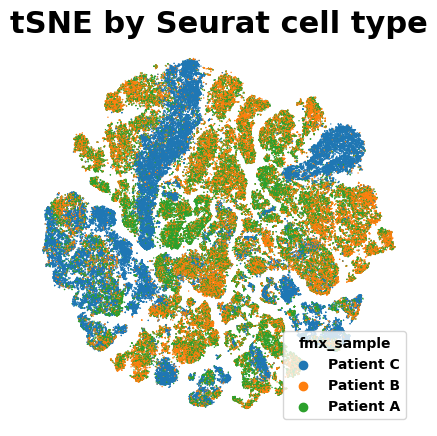

In [34]:
x_var = "tSNE_1"
y_var = "tSNE_2"
color_var = "fmx_sample"

plot_dimreduc(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    # palette=palettes_dict[color_var],
    figsize=(5, 5),
)
# handles, labels = plt.gca().get_legend_handles_labels()

# legend_order = list(palettes_dict[color_var].keys())
# legend_order_index = list(reversed([labels.index(x) for x in legend_order]))


plt.title("tSNE by Seurat cell type", fontsize=22, fontweight="bold")
sns.despine(bottom=True, left=True)

plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.png",
    dpi=600,
    bbox_inches="tight",
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.svg",
    dpi=600,
    bbox_inches="tight",
)

In [ ]:
x_var = "tSNE_1"
y_var = "tSNE_2"
color_var = "fmx_sample"

plot_dimreduc(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    # palette=palettes_dict[color_var],
    figsize=(5, 5),
)
# handles, labels = plt.gca().get_legend_handles_labels()

# legend_order = list(palettes_dict[color_var].keys())
# legend_order_index = list(reversed([labels.index(x) for x in legend_order]))


plt.title("tSNE by Seurat cell type", fontsize=22, fontweight="bold")
sns.despine(bottom=True, left=True)

plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.png",
    dpi=600,
    bbox_inches="tight",
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.svg",
    dpi=600,
    bbox_inches="tight",
)

In [22]:
palettes_dict["tech_alias"]

{'10x v2': '#1b9e77',
 '10x v1': '#d95f02',
 '10x v1.1': '#7570b3',
 '10x MO': '#e7298a',
 'mtscATAC-seq': '#66a61e',
 'ddSEQ SureCell': '#e6ab02',
 's3-ATAC': '#a6761d',
 'HyDrop': '#666666'}

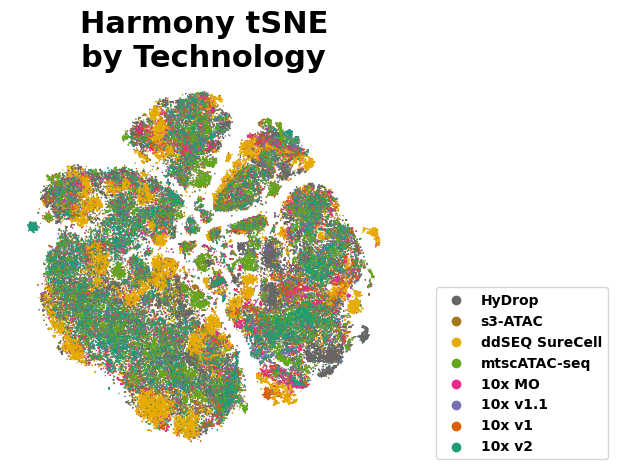

In [23]:
x_var = "tSNE_1_tSNE_harmony_by_sample_id"
y_var = "tSNE_2_tSNE_harmony_by_sample_id"
color_var = "tech_alias"

plot_dimreduc(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    palette=palettes_dict[color_var],
    figsize=(5, 5),
)
handles, labels = plt.gca().get_legend_handles_labels()

legend_order = list(palettes_dict[color_var].keys())
legend_order_index = list(reversed([labels.index(x) for x in legend_order]))
sns.despine(bottom=True, left=True)
plt.title("Harmony tSNE\nby Technology", fontsize=22, fontweight="bold")

plt.legend(
    [handles[i] for i in legend_order_index],
    [labels[i] for i in legend_order_index],
    loc=(1.10, 0),
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.png",
    dpi=600,
    bbox_inches="tight",
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.svg",
    dpi=600,
    bbox_inches="tight",
)

In [40]:
df["fmx_sample"] = [x.replace("Patient C", "Other") for x in df["fmx_sample"]]

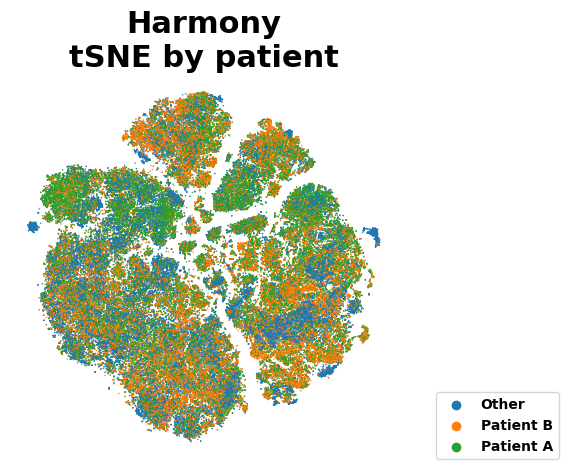

In [43]:
x_var = "tSNE_1_tSNE_harmony_by_sample_id"
y_var = "tSNE_2_tSNE_harmony_by_sample_id"
color_var = "fmx_sample"

plot_dimreduc(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    # palette=palettes_dict[color_var],
    figsize=(5, 5),
)
# handles, labels = plt.gca().get_legend_handles_labels()

# legend_order = list(palettes_dict[color_var].keys())
# legend_order_index = list(reversed([labels.index(x) for x in legend_order]))


plt.title("Harmony\ntSNE by patient", fontsize=22, fontweight="bold")
sns.despine(bottom=True, left=True)
plt.legend(
    loc=(1.10, 0),
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.png",
    dpi=600,
    bbox_inches="tight",
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.svg",
    dpi=600,
    bbox_inches="tight",
)

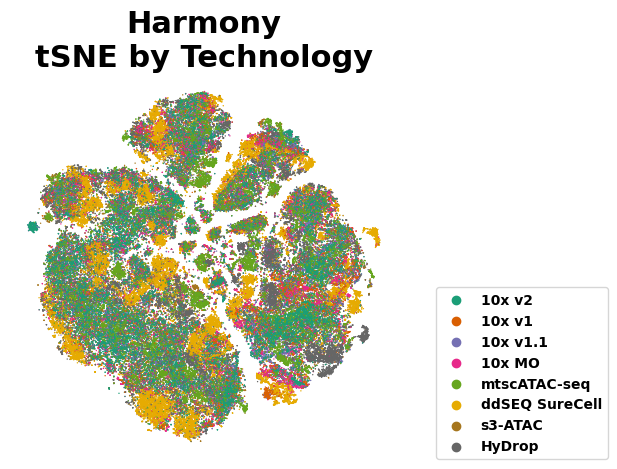

In [36]:
x_var = "tSNE_1_tSNE_harmony_by_sample_id"
y_var = "tSNE_2_tSNE_harmony_by_sample_id"
color_var = "tech_alias"

plot_dimreduc(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    palette=palettes_dict[color_var],
    figsize=(5, 5),
)
handles, labels = plt.gca().get_legend_handles_labels()

legend_order = list(palettes_dict[color_var].keys())
legend_order_index = [labels.index(x) for x in legend_order]
sns.despine(bottom=True, left=True)
plt.legend(
    [handles[i] for i in legend_order_index],
    [labels[i] for i in legend_order_index],
    loc=(1.10, 0),
)
plt.title("Harmony\ntSNE by Technology", fontsize=22, fontweight="bold")
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.png",
    dpi=600,
    bbox_inches="tight",
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.svg",
    dpi=600,
    bbox_inches="tight",
)

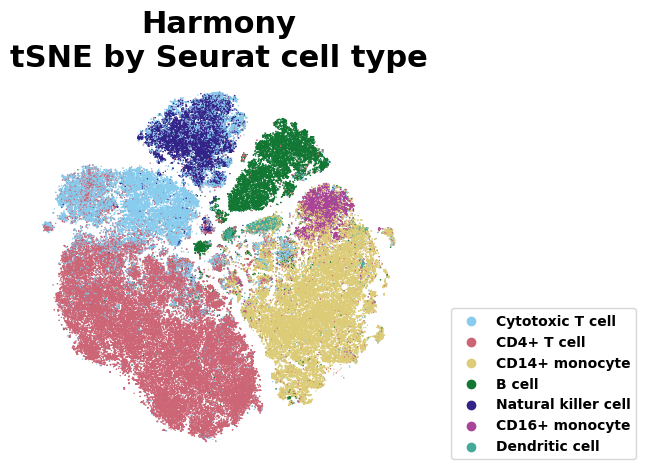

In [27]:
x_var = "tSNE_1_tSNE_harmony_by_sample_id"
y_var = "tSNE_2_tSNE_harmony_by_sample_id"
color_var = "seurat_cell_type"

plot_dimreduc(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    palette=palettes_dict[color_var],
    figsize=(5, 5),
)
handles, labels = plt.gca().get_legend_handles_labels()

legend_order = list(palettes_dict[color_var].keys())
legend_order_index = [labels.index(x) for x in legend_order]
sns.despine(bottom=True, left=True)
plt.legend(
    [handles[i] for i in legend_order_index],
    [labels[i] for i in legend_order_index],
    loc=(1.10, 0),
)
plt.title("Harmony\ntSNE by Seurat cell type", fontsize=22, fontweight="bold")
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.png",
    dpi=600,
    bbox_inches="tight",
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}.svg",
    dpi=600,
    bbox_inches="tight",
)

In [33]:
a = 1

In [32]:
palettes_dict

{'tech_alias': {'10x v2': '#1b9e77',
  '10x v1': '#d95f02',
  '10x v1.1': '#7570b3',
  '10x MO': '#e7298a',
  'mtscATAC-seq': '#66a61e',
  'ddSEQ SureCell': '#e6ab02',
  's3-ATAC': '#a6761d',
  'HyDrop': '#666666'},
 'seurat_cell_type': {'Cytotoxic T cell': (0.5333333333333333,
   0.8,
   0.9333333333333333),
  'CD4+ T cell': (0.8, 0.4, 0.4666666666666667),
  'CD14+ monocyte': (0.8666666666666667, 0.8, 0.4666666666666667),
  'B cell': (0.06666666666666667, 0.4666666666666667, 0.2),
  'Natural killer cell': (0.2, 0.13333333333333333, 0.5333333333333333),
  'CD16+ monocyte': (0.6666666666666666, 0.26666666666666666, 0.6),
  'Dendritic cell': (0.26666666666666666, 0.6666666666666666, 0.6)},
 'consensus_cell_type': {'Cytotoxic T cell': (0.5333333333333333,
   0.8,
   0.9333333333333333),
  'CD4+ T cell': (0.8, 0.4, 0.4666666666666667),
  'CD14+ monocyte': (0.8666666666666667, 0.8, 0.4666666666666667),
  'B cell': (0.06666666666666667, 0.4666666666666667, 0.2),
  'Natural killer cell': (0.2

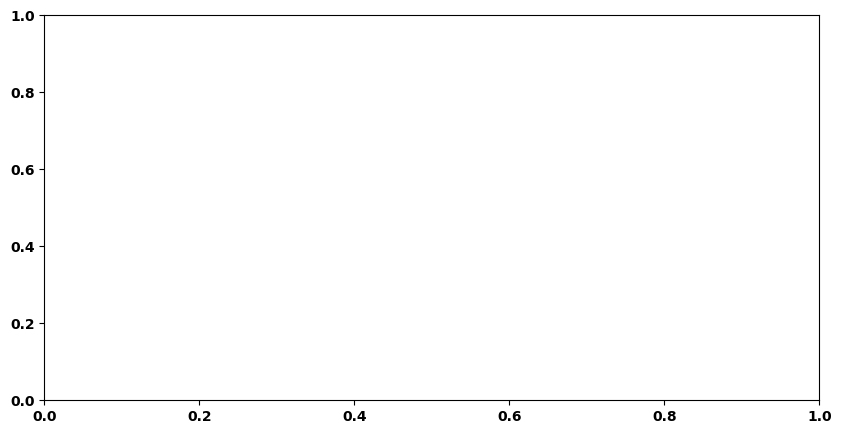

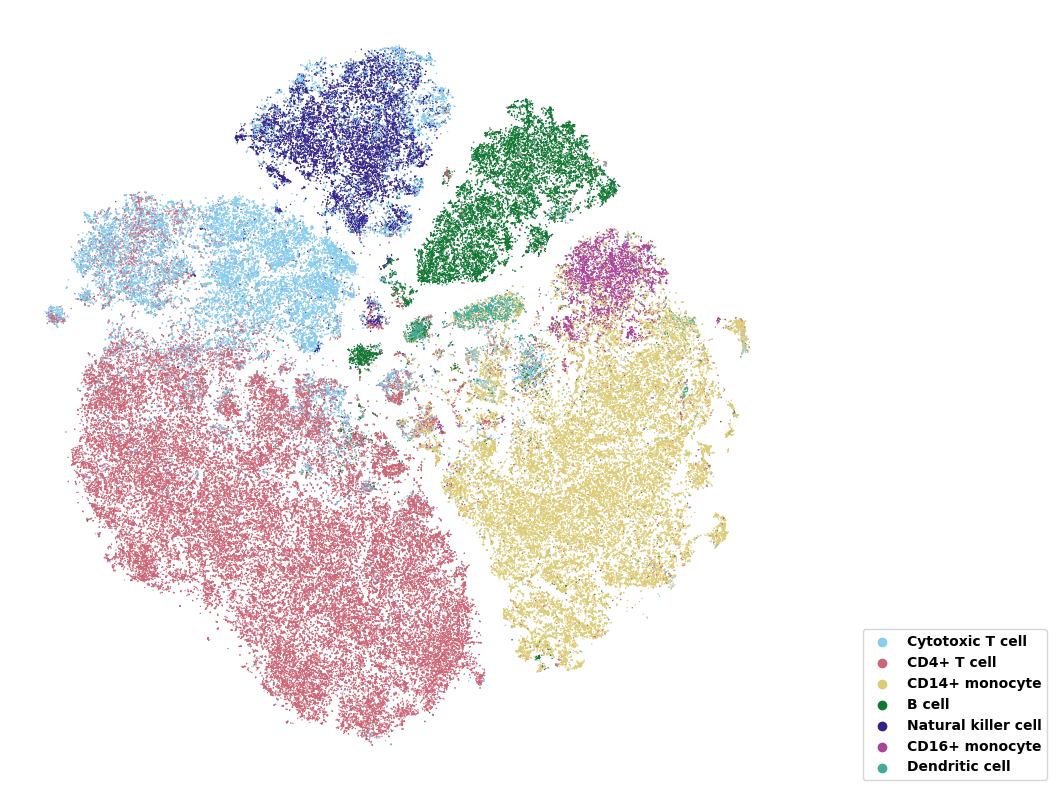

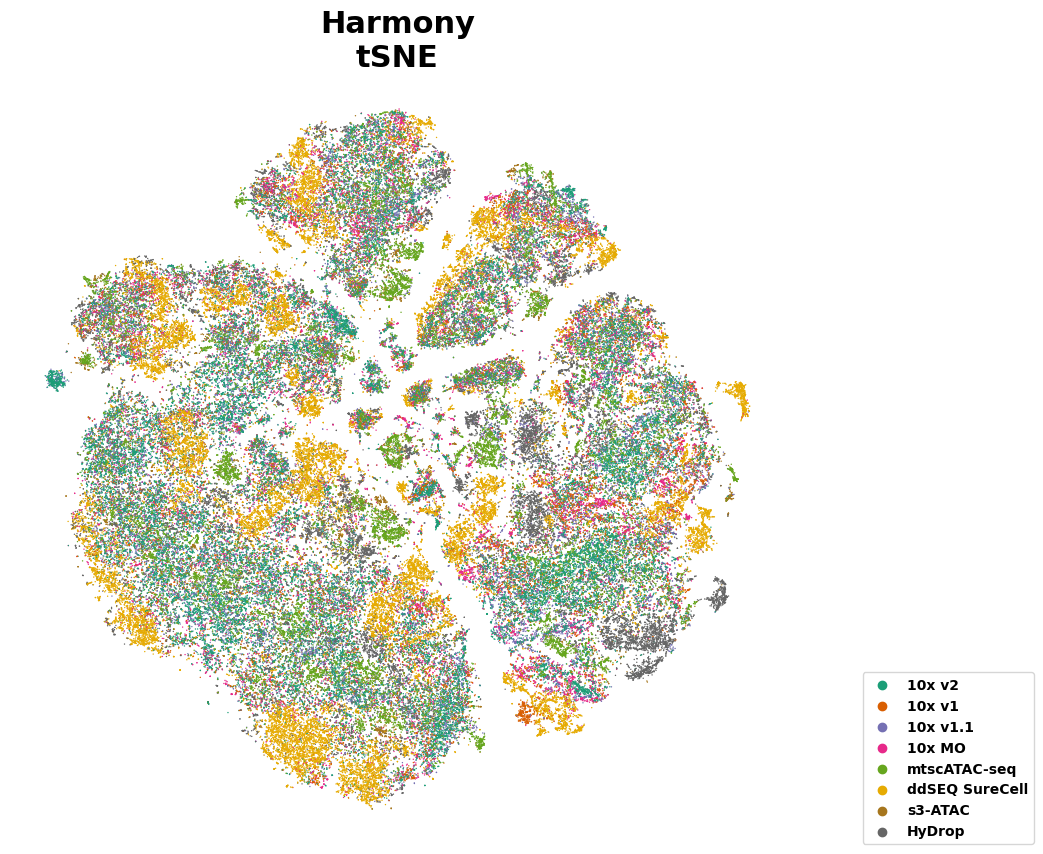

In [35]:
x_var = "tSNE_1_tSNE_harmony_by_sample_id"
y_var = "tSNE_2_tSNE_harmony_by_sample_id"
color_var = "seurat_cell_type"
vars_toplot = ["seurat_cell_type", "tech_alias"]
fig, axes = plt.subplots(figsize=(10, 5))

for color_var in vars_toplot:
    plot_dimreduc(
        df,
        x_var=x_var,
        y_var=y_var,
        color_var=color_var,
        palette=palettes_dict[color_var],
    )
    handles, labels = plt.gca().get_legend_handles_labels()

    legend_order = list(palettes_dict[color_var].keys())
    legend_order_index = [labels.index(x) for x in legend_order]
    sns.despine(bottom=True, left=True)
    plt.legend(
        [handles[i] for i in legend_order_index],
        [labels[i] for i in legend_order_index],
        loc=(1.10, 0),
    )

plt.title("Harmony\ntSNE", fontsize=22, fontweight="bold")
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}2.png",
    dpi=600,
    bbox_inches="tight",
)
plt.savefig(
    f"plts_dimreduc/fixedcells_{x_var}_{y_var}_{color_var}2.svg",
    dpi=600,
    bbox_inches="tight",
)

In [25]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'cisTopic_log_nr_frag',
       'cisTopic_nr_frag', 'cisTopic_log_nr_acc', 'cisTopic_nr_acc',
       'Log_total_nr_frag', 'Log_unique_nr_frag', 'Total_nr_frag',
       'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'barcode', 'Doublet_scores_fragments',
       'Predicted_doublets_fragments', 'fmx_droplet_type', 'fmx_sample',
       'pycisTopic_leiden_10_3.0', 'tech', 'centre_tech',
       'Log_unique_nr_frag_in_regions', 'consensus_cell_type_individual',
       'seurat_cell_type_pred_score', 'seurat_cell_type',
       'consensus_cell_type', 'UMAP_1', 'UMAP_2', 'tSNE_1', 'tSNE_2',
       'UMAP_1_UMAP', 'UMAP_2_UMAP', 'tSNE_1_tSNE', 'tSNE_2_tSNE',
       'UMAP_1_UMAP_harmony_by_sample_id', 'UMAP_2_UMAP_harmony_by_sample_id',
       'tSNE_1_tSNE_harmony_by_sample_id', 'tSNE_2_tSNE_harmony_by_sample_id',
       'tech_alias'],
      dtype='object'

In [26]:
n_samples = 1
n_var = 1
# initialize gridspec
from matplotlib.gridspec import GridSpec

grid_start = 0
fig = plt.figure(
    figsize=(individual_barplot_width * n_samples, individual_plot_row_height * n_var),
)
gs = GridSpec(1, n_samples, figure=fig)
ax = fig.add_subplot(gs[0, grid_start:grid_end])

df_normalized.plot.bar(stacked=True, ax=ax, colormap=cell_type_color_palette)

# .set_ylim(ylim_dict[variable])
# ax.get_legend().remove()


# only set title on top row
if variable == variables_list[0]:
    ax.set_title(tech_alias_dict[tech], fontsize=22, fontweight="bold")
else:
    ax.set_title(None)

# only set y label on left col
if tech == tech_order[0]:
    ax.set_ylabel("Annotation", fontsize=22, fontweight="bold")
else:
    ax.set_ylabel(None)
    ax.set_yticklabels([])

ax.set(xlabel="")
ax.set_xticklabels([])

# start coordinate of next tech is end coordinate of previous tech
plt.rcParams["font.weight"] = "bold"
order = [6, 5, 4, 3, 2, 1, 0]
handles, labels = plt.gca().get_legend_handles_labels()

plt.legend([handles[i] for i in order], [labels[i] for i in order], loc=(1.1, 0))
# plt.tight_layout()

plt.savefig(
    f"plts_scrap/fixedcells__cell_composition_reference.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    f"plts_scrap/fixedcells__cell_composition_reference_merged.svg", dpi=600, facecolor="white"
)
# plt.savefig(f"plts_scrap/fixedcells__boxplots_{y_var}.svg", dpi=900)

plt.show()

NameError: name 'individual_barplot_width' is not defined

In [ ]:
from adjustText import adjust_text
import numpy as np

# plot some medians

In [13]:
cell_data_path_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_3_cistopic_consensus/cistopic_objects/*consensus.cell_data.tsv"
        )
    )
}

In [14]:
cell_data_path_dict

{'BIO_ddseq_1.FIXEDCELLS': '../fixedcells_3_cistopic_consensus/cistopic_objects/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_11topics.dimreduc.consensus.cell_data.tsv',
 'BIO_ddseq_2.FIXEDCELLS': '../fixedcells_3_cistopic_consensus/cistopic_objects/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_14topics.dimreduc.consensus.cell_data.tsv',
 'BIO_ddseq_3.FIXEDCELLS': '../fixedcells_3_cistopic_consensus/cistopic_objects/BIO_ddseq_3.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_10topics.dimreduc.consensus.cell_data.tsv',
 'BIO_ddseq_4.FIXEDCELLS': '../fixedcells_3_cistopic_consensus/cistopic_objects/BIO_ddseq_4.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_11topics.dimreduc.consensus.cell_data.tsv',
 'BRO_mtscatac_1.FIXEDCELLS': '../fixedcells_3_cistopic_consensus/cistopic_objects/BRO_mtscatac_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_11topics.dimreduc.consensus.cell_data.tsv',
 'BRO_mtscatac_2.FIXEDCELLS': '../fixedcells_3_cistopic_consensus/cistopic_obje

In [15]:
cell_data_merged = pd.DataFrame()
for sample in cell_data_path_dict.keys():
    df = pd.read_csv(cell_data_path_dict[sample], sep=",", index_col=0)
    cell_data_merged = pd.concat([cell_data_merged, df])

In [19]:
cell_data_merged.index = [
    x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
    .replace("CNA_10xv11_5", "CNA_10xv11c_2")
    .replace("BRO_mtscatac", "BRO_mtscatacfacs")
    for x in cell_data_merged.index
]

cell_data_merged["sample_id"] = [
    x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
    .replace("CNA_10xv11_5", "CNA_10xv11c_2")
    .replace("BRO_mtscatac", "BRO_mtscatacfacs")
    for x in cell_data_merged["sample_id"]
]

In [20]:
cell_data_merged.columns

Index(['cisTopic_log_nr_acc', 'cisTopic_log_nr_frag', 'cisTopic_nr_frag',
       'cisTopic_nr_acc', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'barcode', 'Doublet_scores_fragments',
       'Predicted_doublets_fragments', 'seurat_cell_type',
       'seurat_cell_type_pred_score', 'pycisTopic_leiden_10_3.0',
       'consensus_cell_type', 'fmx_droplet_type', 'fmx_sample'],
      dtype='object')

In [21]:
sample_id_alias_dict = {
    x: x.replace(".FIXEDCELLS", "").replace("_", " ")
    for x in sorted(cell_data_merged["sample_id"].unique())
}

In [23]:
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}

In [24]:
for key in sample_id_alias_dict.keys():
    for tech in tech_alias_dict.keys():
        sample_id_alias_dict[key] = sample_id_alias_dict[key].replace(
            tech, tech_alias_dict[tech]
        )

In [25]:
for key in sample_id_alias_dict.keys():
    for tech in tech_alias_dict.keys():
        sample_id_alias_dict[key] = sample_id_alias_dict[key].replace(
            tech, tech_alias_dict[tech]
        )

In [26]:
centre_alias_dict = {
    "BIO": "BIO",
    "OHS": "OHSU",
    "VIB": "VIB",
    "EPF": "EPFL",
    "CNA": "CNAG",
    "STA": "Stanford",
    "HAR": "Harvard",
    "TXG": "TXG",
    "MDC": "MDC",
    "SAN": "Sanger",
}

In [27]:
for key in sample_id_alias_dict.keys():
    for centre in centre_alias_dict.keys():
        sample_id_alias_dict[key] = (
            sample_id_alias_dict[key]
            .replace(centre, centre_alias_dict[centre])
            .replace("11", "1")
            .replace("12", "1")
            .replace("21", "2")
            .replace("22", "2")
        )

In [28]:
sample_id_alias_dict

{'BIO_ddseq_1.FIXEDCELLS': 'BIO Bio-Rad ddSEQ SureCell 1',
 'BIO_ddseq_2.FIXEDCELLS': 'BIO Bio-Rad ddSEQ SureCell 2',
 'BIO_ddseq_3.FIXEDCELLS': 'BIO Bio-Rad ddSEQ SureCell 3',
 'BIO_ddseq_4.FIXEDCELLS': 'BIO Bio-Rad ddSEQ SureCell 4',
 'BRO_mtscatacfacs_1.FIXEDCELLS': 'BRO mtscATAC-seqfacs 1',
 'BRO_mtscatacfacs_2.FIXEDCELLS': 'BRO mtscATAC-seqfacs 2',
 'CNA_10xmultiome_1.FIXEDCELLS': 'CNAG 10x Multiome 1',
 'CNA_10xmultiome_2.FIXEDCELLS': 'CNAG 10x Multiome 2',
 'CNA_10xv11_1.FIXEDCELLS': 'CNAG 10x v1 1',
 'CNA_10xv11_2.FIXEDCELLS': 'CNAG 10x v1 2',
 'CNA_10xv11_3.FIXEDCELLS': 'CNAG 10x v1 3',
 'CNA_10xv11c_1.FIXEDCELLS': 'CNAG 10x v1c 1',
 'CNA_10xv11c_2.FIXEDCELLS': 'CNAG 10x v1c 2',
 'CNA_10xv2_1.FIXEDCELLS': 'CNAG 10x v2 1',
 'CNA_10xv2_2.FIXEDCELLS': 'CNAG 10x v2 2',
 'CNA_hydrop_1.FIXEDCELLS': 'CNAG HyDrop 1',
 'CNA_hydrop_2.FIXEDCELLS': 'CNAG HyDrop 2',
 'CNA_hydrop_3.FIXEDCELLS': 'CNAG HyDrop 3',
 'CNA_mtscatac_1.FIXEDCELLS': 'CNAG mtscATAC-seq 1',
 'CNA_mtscatac_2.FIXEDCELLS

In [29]:
cell_data_merged["sample_id_alias"] = [
    sample_id_alias_dict[x] for x in cell_data_merged["sample_id"]
]

In [30]:
cell_data_merged

cisTopic_log_nr_acc  \
CAGGCGGATGAATAAAGTGCG_CGCGGCGACCTACCGCAGTGT___B...             3.684217   
ACACGCGATATAACATTCGTT_TTCCTCTTCGTTCTGCTAATT___B...             3.597366   
AACGGTGGAGAGGTTAGTGTT_TTGTAAGCGTTTGATGAGGAG___B...             3.850524   
ATAGTTGTGAGATTGAATCAA___BIO_ddseq_1.FIXEDCELLS                 3.683317   
TACGCATTCTGAACGAGCGTG___BIO_ddseq_1.FIXEDCELLS                 3.658107   
...                                                                 ...   
GACGAGGTAAGATGGCCAAC___VIB_hydrop_22.FIXEDCELLS                2.828015   
AGGTTGCATTATCCGAGTAT___VIB_hydrop_22.FIXEDCELLS                2.781037   
TCAAGAGGCGAGGACGTTCG___VIB_hydrop_22.FIXEDCELLS                2.986772   
GGAGTATTCTCAAGACGTCT___VIB_hydrop_22.FIXEDCELLS                3.048442   
ATACGCAAGAACCTATCAGA___VIB_hydrop_22.FIXEDCELLS                2.872156   

                                                    cisTopic_log_nr_frag  \
CAGGCGGATGAATAAAGTGCG_CGCGGCGACCTACCGCAGTGT___B...              3.775756   
ACACGCGATATAACATTCGTT_TTCCTCTTCGTTCTGCTAATT___B...              3.681241   
AACGGTGGAGAGGTTAGTGTT_TTGTAAGCGTTTGATGAGGAG___B...              3.967782   
ATAGTTGTGAGATTGAATCAA___BIO_ddseq_1.FIXEDCELLS                  3.776411   
TACGCATTCTGAACGAGCGTG___BIO_ddseq_1.FIXEDCELLS                  3.740600   
...                                                                  ...   
GACGAGGTAAGATGGCCAAC___VIB_hydrop_22.FIXEDCELLS                 2.883093   
AGGTTGCATTATCCGAGTAT___VIB_hydrop_22.FIXEDCELLS                 2.961895   
TCAAGAGGCGAGGACGTTCG___VIB_hydrop_22.FIXEDCELLS                 3.149835   
GGAGTATTCTCAAGACGTCT___VIB_hydrop_22.FIXEDCELLS                 3.171726   
ATACGCAAGAACCTATCAGA___VIB_hydrop_22.FIXEDCELLS                 2.991226   

                                                    cisTopic_nr_frag  \
CAGGCGGATGAATAAAGTGCG_CGCGGCGACCTACCGCAGTGT___B...              5967   
ACACGCGATATAACATTCGTT_TTCCTCTTCGTTCTGCTAATT___B...              4800   
AACGGTGGAGAGGTTAGTGTT_TTGTAAGCGTTTGATGAGGAG___B...              9285   
ATAGTTGTGAGATTGAATCAA___BIO_ddseq_1.FIXEDCELLS                  5976   
TACGCATTCTGAACGAGCGTG___BIO_ddseq_1.FIXEDCELLS                  5503   
...                                                              ...   
GACGAGGTAAGATGGCCAAC___VIB_hydrop_22.FIXEDCELLS                  764   
AGGTTGCATTATCCGAGTAT___VIB_hydrop_22.FIXEDCELLS                  916   
TCAAGAGGCGAGGACGTTCG___VIB_hydrop_22.FIXEDCELLS                 1412   
GGAGTATTCTCAAGACGTCT___VIB_hydrop_22.FIXEDCELLS                 1485   
ATACGCAAGAACCTATCAGA___VIB_hydrop_22.FIXEDCELLS                  980   

                                                    cisTopic_nr_acc  \
CAGGCGGATGAATAAAGTGCG_CGCGGCGACCTACCGCAGTGT___B...             4833   
ACACGCGATATAACATTCGTT_TTCCTCTTCGTTCTGCTAATT___B...             3957   
AACGGTGGAGAGGTTAGTGTT_TTGTAAGCGTTTGATGAGGAG___B...             7088   
ATAGTTGTGAGATTGAATCAA___BIO_ddseq_1.FIXEDCELLS                 4823   
TACGCATTCTGAACGAGCGTG___BIO_ddseq_1.FIXEDCELLS                 4551   
...                                                             ...   
GACGAGGTAAGATGGCCAAC___VIB_hydrop_22.FIXEDCELLS                 673   
AGGTTGCATTATCCGAGTAT___VIB_hydrop_22.FIXEDCELLS                 604   
TCAAGAGGCGAGGACGTTCG___VIB_hydrop_22.FIXEDCELLS                 970   
GGAGTATTCTCAAGACGTCT___VIB_hydrop_22.FIXEDCELLS                1118   
ATACGCAAGAACCTATCAGA___VIB_hydrop_22.FIXEDCELLS                 745   

                                                    Log_total_nr_frag  \
CAGGCGGATGAATAAAGTGCG_CGCGGCGACCTACCGCAGTGT___B...           4.495669   
ACACGCGATATAACATTCGTT_TTCCTCTTCGTTCTGCTAATT___B...           4.434553   
AACGGTGGAGAGGTTAGTGTT_TTGTAAGCGTTTGATGAGGAG___B...           4.727330   
ATAGTTGTGAGATTGAATCAA___BIO_ddseq_1.FIXEDCELLS               4.381927   
TACGCATTCTGAACGAGCGTG___BIO_ddseq_1.FIXEDCELLS               4.313952   
...                                                               ...   
GACGAGGTA

In [31]:
sample_id_ultrashort_alias_dict = {
    "BIO_ddseq_1.FIXEDCELLS": "ddS Bi1",
    "BIO_ddseq_2.FIXEDCELLS": "ddS Bi2",
    "BIO_ddseq_3.FIXEDCELLS": "ddS Bi3",
    "BIO_ddseq_4.FIXEDCELLS": "ddS Bi4",
    "BRO_mtscatacfacs_1.FIXEDCELLS": "mt* Br1",
    "BRO_mtscatacfacs_2.FIXEDCELLS": "mt* Br2",
    "CNA_10xmultiome_1.FIXEDCELLS": "MO C1",
    "CNA_10xmultiome_2.FIXEDCELLS": "MO C2",
    "CNA_10xv11_1.FIXEDCELLS": "v1.1 C1",
    "CNA_10xv11_2.FIXEDCELLS": "v1.1 C2",
    "CNA_10xv11_3.FIXEDCELLS": "v1.1 C3",
    "CNA_10xv11c_1.FIXEDCELLS": "v1.1c C1",
    "CNA_10xv11c_2.FIXEDCELLS": "v1.1c C2",
    "CNA_10xv2_1.FIXEDCELLS": "v2 C1",
    "CNA_10xv2_2.FIXEDCELLS": "v2 C2",
    "CNA_hydrop_1.FIXEDCELLS": "Hy C1",
    "CNA_hydrop_2.FIXEDCELLS": "Hy C2",
    "CNA_hydrop_3.FIXEDCELLS": "Hy C3",
    "CNA_mtscatac_1.FIXEDCELLS": "mt C1",
    "CNA_mtscatac_2.FIXEDCELLS": "mt C2",
    "EPF_hydrop_1.FIXEDCELLS": "Hy E1",
    "EPF_hydrop_2.FIXEDCELLS": "Hy E2",
    "EPF_hydrop_3.FIXEDCELLS": "Hy E3",
    "EPF_hydrop_4.FIXEDCELLS": "Hy E4",
    "HAR_ddseq_1.FIXEDCELLS": "ddS H1",
    "HAR_ddseq_2.FIXEDCELLS": "ddS H2",
    "MDC_mtscatac_1.FIXEDCELLS": "mt M1",
    "MDC_mtscatac_2.FIXEDCELLS": "mt M2",
    "OHS_s3atac_1.FIXEDCELLS": "s3 O1",
    "OHS_s3atac_2.FIXEDCELLS": "s3 O2",
    "SAN_10xmultiome_1.FIXEDCELLS": "MO Sa1",
    "SAN_10xmultiome_2.FIXEDCELLS": "MO Sa2",
    "STA_10xv11_1.FIXEDCELLS": "v1.1 St1",
    "STA_10xv11_2.FIXEDCELLS": "v1.1 St2",
    "TXG_10xv11_1.FIXEDCELLS": "v1.1 T1",
    "TXG_10xv2_1.FIXEDCELLS": "v2 T1",
    "TXG_10xv2_2.FIXEDCELLS": "v2 T2",
    "UCS_ddseq_1.FIXEDCELLS": "ddS U1",
    "UCS_ddseq_2.FIXEDCELLS": "ddS U2",
    "VIB_10xmultiome_1.FIXEDCELLS": "MO V1",
    "VIB_10xmultiome_2.FIXEDCELLS": "MO V2",
    "VIB_10xv1_1.FIXEDCELLS": "v1 V1",
    "VIB_10xv1_2.FIXEDCELLS": "v1 V2",
    "VIB_10xv2_1.FIXEDCELLS": "v2 V1",
    "VIB_10xv2_2.FIXEDCELLS": "v2 V2",
    "VIB_hydrop_1.FIXEDCELLS": "Hy V1",
    "VIB_hydrop_2.FIXEDCELLS": "Hy V2",
    "VIB_hydrop_11.FIXEDCELLS": "Hy V1",
    "VIB_hydrop_12.FIXEDCELLS": "Hy V1",
    "VIB_hydrop_21.FIXEDCELLS": "Hy V2",
    "VIB_hydrop_22.FIXEDCELLS": "Hy V2",
}

In [32]:
cell_data_merged["sample_id_short_alias"] = [
    sample_id_ultrashort_alias_dict[x] for x in cell_data_merged["sample_id"]
]

In [33]:
df_medians = cell_data_merged.groupby("sample_id_short_alias").median()

/tmp/ipykernel_3597196/2641436122.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_medians = cell_data_merged.groupby("sample_id_short_alias").median()


In [34]:
counts = pd.DataFrame(cell_data_merged["sample_id_short_alias"].value_counts())

In [35]:
counts

sample_id_short_alias
v2 T1                      9491
v2 T2                      9461
v1.1 T1                    9443
v1 V2                      7431
mt M1                      7319
ddS Bi1                    5749
v2 C2                      5554
mt M2                      5357
ddS U1                     5143
ddS Bi2                    4811
ddS H2                     4691
ddS U2                     4457
ddS H1                     4419
v1.1 C3                    4301
MO Sa2                     3896
v2 C1                      3887
mt* Br1                    3436
MO C1                      3291
mt* Br2                    3289
MO Sa1                     3161
Hy E1                      3139
v2 V2                      3118
s3 O1                      3100
v2 V1                      3013
Hy E2                      3012
MO C2                      2956
Hy V2                      2949
v1 V1                      2779
ddS Bi3                    2758
Hy E3                      2735
Hy E4                      2711
v1.1 C2                    2647
ddS Bi4                    2607
v1.1 C1                    2586
mt C1                      2537
Hy V1                      2408
Hy C2                      2118
MO V2                      1920
Hy C1                      1767
s3 O2                      1754
v1.1 St2                   1517
Hy C3                      1415
MO V1                      1196
mt C2                      1110
v1.1c C2                   1067
v1.1 St1                    885
v1.1c C1                    765

In [36]:
df_medians["count"] = counts

In [37]:
df_medians

cisTopic_log_nr_acc  cisTopic_log_nr_frag  \
sample_id_short_alias                                              
Hy C1                             2.705864              2.841359   
Hy C2                             2.851258              2.957368   
Hy C3                             2.789581              2.953276   
Hy E1                             3.220370              3.360972   
Hy E2                             3.214976              3.362011   
Hy E3                             3.250908              3.405858   
Hy E4                             3.276462              3.439964   
Hy V1                             3.232234              3.447003   
Hy V2                             3.284656              3.480869   
MO C1                             3.735998              3.820399   
MO C2                             3.594006              3.649870   
MO Sa1                            3.854063              3.928396   
MO Sa2                            3.834452              3.904093   
MO V1                             3.480223              3.540016   
MO V2                             3.546666              3.607884   
ddS Bi1                           3.620240              3.698622   
ddS Bi2                           3.706291              3.797198   
ddS Bi3                           3.630072              3.728922   
ddS Bi4                           3.669967              3.772835   
ddS H1                            3.738860              3.824906   
ddS H2                            3.696880              3.783117   
ddS U1                            3.486005              3.549003   
ddS U2                            3.529943              3.596927   
mt C1                             3.376029              3.549371   
mt C2                             3.489955              3.620812   
mt M1                             3.763952              3.955399   
mt M2                             3.480007              3.739889   
mt* Br1                           3.853059              4.055474   
mt* Br2                           3.837210              4.043126   
s3 O1                             3.228529              3.287241   
s3 O2                             2.733197              2.942008   
v1 V1                             3.771514              3.846213   
v1 V2                             3.751972              3.805976   
v1.1 C1                           3.641276              3.700574   
v1.1 C2                           3.674861              3.739335   
v1.1 C3                           3.806044              3.873495   
v1.1 St1                          3.712734              3.761853   
v1.1 St2                          3.618048              3.653598   
v1.1 T1                           3.828273              3.885135   
v1.1c C1                          3.891593              3.982543   
v1.1c C2                          3.878177              3.973035   
v2 C1                             3.825231              3.923140   
v2 C2                             3.816241              3.914608   
v2 T1                             4.045558              4.137132   
v2 T2                             4.040840              4.133571   
v2 V1                             4.057019              4.200467   
v2 V2                             4.068334              4.214831   

                       cisTopic_nr_frag  cisTopic_nr_acc  Log_total_nr_frag  \
sample_id_short_alias                                                         
Hy C1                             694.0            508.0           3.654658   
Hy C2                             906.5            710.0           3.620188   
Hy C3                             898.0            616.0           3.548635   
Hy E1                            2296.0           1661.0           4.141732   
Hy E2                            2301.5           1640.5           4.119553   
Hy E3                            2546.0           1782.0           4.171200   
Hy E4                            2754.0           1890.0  

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metadata(
    df,
    x_var="tSNE_1",
    y_var="tSNE_2",
    color_var=None,
    x_axis_scale="linear",
    y_axis_scale="linear",
    s=1,
    remove_legend=False,
    palette=None,
    figsize=(10, 10),
    xlabel=None,
    ylabel=None,
):
    # initialize ax
    fig, ax = plt.subplots(figsize=figsize)

    # actually plot
    sns.scatterplot(
        data=df, x=x_var, y=y_var, s=s, ax=ax, hue=color_var, palette=palette
    )
    if remove_legend == True:
        ax.get_legend().remove()

    if xlabel != None:
        ax.set_xlabel(xlabel, fontsize=16, fontweight="bold")

    if ylabel != None:
        ax.set_ylabel(ylabel, fontsize=16, fontweight="bold")

    plt.rcParams["font.weight"] = "bold"
    ax.tick_params(axis="both", which="major", labelsize=14)
    ax.tick_params(axis="both", which="minor", labelsize=14)
    # finetune plot
    ax.set_xscale(x_axis_scale)
    ax.set_yscale(y_axis_scale)

In [44]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xv11c": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "mtscatacfacs": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [45]:
sample_id_alias_short_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [46]:
sample_id_short_alias_palette = {
    sample_id_ultrashort_alias_dict[x]: tech_color_palette[x.split("_")[1]]
    for x in sorted(cell_data_merged["sample_id"].unique())
}

In [48]:
cell_data_merged["sample_id_short_alias"] = [
    sample_id_ultrashort_alias_dict[x] for x in cell_data_merged["sample_id"]
]

In [49]:
df_medians = cell_data_merged.groupby("sample_id_short_alias").median()

/tmp/ipykernel_3597196/2641436122.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_medians = cell_data_merged.groupby("sample_id_short_alias").median()


In [50]:
df_medians["seurat_cell_type_pred_score"]

sample_id_short_alias
Hy C1       0.450900
Hy C2       0.466682
Hy C3       0.469812
Hy E1       0.648366
Hy E2       0.598871
Hy E3       0.661603
Hy E4       0.649888
Hy V1       0.580824
Hy V2       0.591176
MO C1       0.798464
MO C2       0.696506
MO Sa1      0.851263
MO Sa2      0.854321
MO V1       0.700214
MO V2       0.755083
ddS Bi1     0.710590
ddS Bi2     0.757492
ddS Bi3     0.749472
ddS Bi4     0.787312
ddS H1      0.813261
ddS H2      0.763971
ddS U1      0.633596
ddS U2      0.674045
mt C1       0.688120
mt C2       0.675086
mt M1       0.786876
mt M2       0.657520
mt* Br1     0.886356
mt* Br2     0.877486
s3 O1       0.654359
s3 O2       0.428706
v1 V1       0.878840
v1 V2       0.804740
v1.1 C1     0.832960
v1.1 C2     0.813782
v1.1 C3     0.846425
v1.1 St1    0.706434
v1.1 St2    0.728316
v1.1 T1     0.806141
v1.1c C1    0.773903
v1.1c C2    0.838754
v2 C1       0.817662
v2 C2       0.810529
v2 T1       0.864998
v2 T2       0.835165
v2 V1       0.909333
v2 V2       

In [51]:
df_medians

cisTopic_log_nr_acc  cisTopic_log_nr_frag  \
sample_id_short_alias                                              
Hy C1                             2.705864              2.841359   
Hy C2                             2.851258              2.957368   
Hy C3                             2.789581              2.953276   
Hy E1                             3.220370              3.360972   
Hy E2                             3.214976              3.362011   
Hy E3                             3.250908              3.405858   
Hy E4                             3.276462              3.439964   
Hy V1                             3.232234              3.447003   
Hy V2                             3.284656              3.480869   
MO C1                             3.735998              3.820399   
MO C2                             3.594006              3.649870   
MO Sa1                            3.854063              3.928396   
MO Sa2                            3.834452              3.904093   
MO V1                             3.480223              3.540016   
MO V2                             3.546666              3.607884   
ddS Bi1                           3.620240              3.698622   
ddS Bi2                           3.706291              3.797198   
ddS Bi3                           3.630072              3.728922   
ddS Bi4                           3.669967              3.772835   
ddS H1                            3.738860              3.824906   
ddS H2                            3.696880              3.783117   
ddS U1                            3.486005              3.549003   
ddS U2                            3.529943              3.596927   
mt C1                             3.376029              3.549371   
mt C2                             3.489955              3.620812   
mt M1                             3.763952              3.955399   
mt M2                             3.480007              3.739889   
mt* Br1                           3.853059              4.055474   
mt* Br2                           3.837210              4.043126   
s3 O1                             3.228529              3.287241   
s3 O2                             2.733197              2.942008   
v1 V1                             3.771514              3.846213   
v1 V2                             3.751972              3.805976   
v1.1 C1                           3.641276              3.700574   
v1.1 C2                           3.674861              3.739335   
v1.1 C3                           3.806044              3.873495   
v1.1 St1                          3.712734              3.761853   
v1.1 St2                          3.618048              3.653598   
v1.1 T1                           3.828273              3.885135   
v1.1c C1                          3.891593              3.982543   
v1.1c C2                          3.878177              3.973035   
v2 C1                             3.825231              3.923140   
v2 C2                             3.816241              3.914608   
v2 T1                             4.045558              4.137132   
v2 T2                             4.040840              4.133571   
v2 V1                             4.057019              4.200467   
v2 V2                             4.068334              4.214831   

                       cisTopic_nr_frag  cisTopic_nr_acc  Log_total_nr_frag  \
sample_id_short_alias                                                         
Hy C1                             694.0            508.0           3.654658   
Hy C2                             906.5            710.0           3.620188   
Hy C3                             898.0            616.0           3.548635   
Hy E1                            2296.0           1661.0           4.141732   
Hy E2                            2301.5           1640.5           4.119553   
Hy E3                            2546.0           1782.0           4.171200   
Hy E4                            2754.0           1890.0  

In [52]:
sns.set_context("notebook")
sns.set_style("darkgrid")

In [53]:
from adjustText import adjust_text

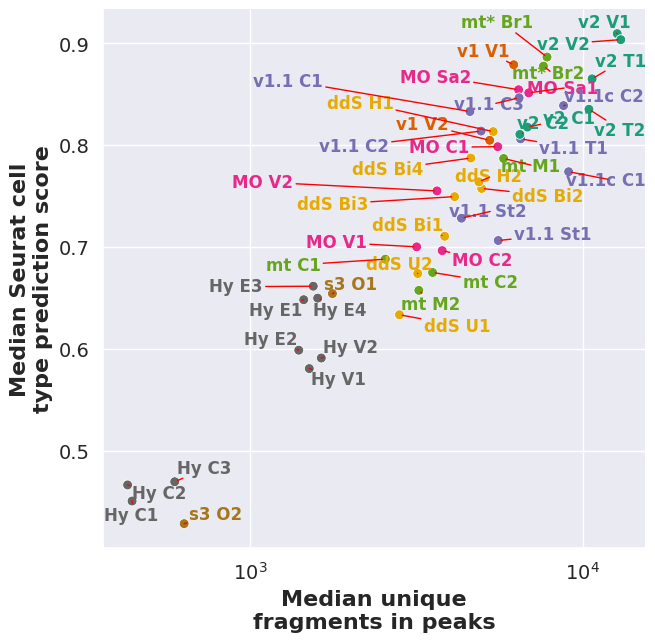

In [54]:
df = df_medians
x_var = "Unique_nr_frag_in_regions"
x_axis_scale = "log"
y_var = "seurat_cell_type_pred_score"
y_axis_scale = "linear"
color_var = "sample_id_short_alias"

plot_metadata(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    x_axis_scale=x_axis_scale,
    y_axis_scale=y_axis_scale,
    s=50,
    remove_legend=True,
    palette=sample_id_short_alias_palette,
    figsize=(7, 7),
    xlabel="Median unique\nfragments in peaks",
    ylabel="Median Seurat cell\ntype prediction score",
)

texts = [
    plt.text(
        df[x_var].loc[sample],
        df[y_var].loc[sample],
        f"{sample}",
        ha="center",
        va="center",
        color=sample_id_short_alias_palette[sample],
    )
    for sample in df.index
]

sns.despine(right=True, top=True)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))

plt.savefig(
    f"plts_general/all_{x_var}_{y_var}_by_{color_var}.png", dpi=600, facecolor="white"
)
plt.savefig(
    f"plts_general/all_{x_var}_{y_var}_by_{color_var}.svg", dpi=600, facecolor="white"
)

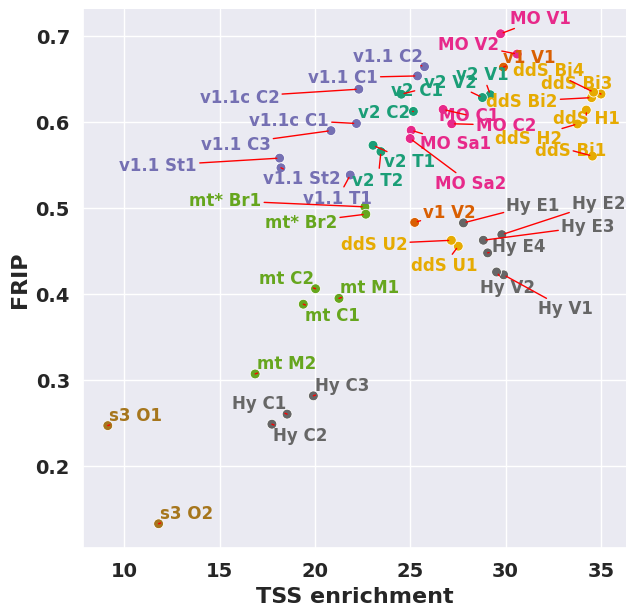

In [55]:
df = df_medians
x_var = "TSS_enrichment"
x_axis_scale = "linear"
y_var = "FRIP"
y_axis_scale = "linear"
color_var = "sample_id_short_alias"

plot_metadata(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    x_axis_scale=x_axis_scale,
    y_axis_scale=y_axis_scale,
    s=50,
    remove_legend=True,
    palette=sample_id_short_alias_palette,
    figsize=(7, 7),
    xlabel="TSS enrichment",
    ylabel="FRIP",
)

texts = [
    plt.text(
        df[x_var].loc[sample],
        df[y_var].loc[sample],
        f"{sample}",
        ha="center",
        va="center",
        color=sample_id_short_alias_palette[sample],
    )
    for sample in df.index
]

sns.despine(right=True, top=True)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))

plt.savefig(
    f"plts_general/all_{x_var}_{y_var}_by_{color_var}.png", dpi=600, facecolor="white"
)
plt.savefig(
    f"plts_general/all_{x_var}_{y_var}_by_{color_var}.svg", dpi=600, facecolor="white"
)

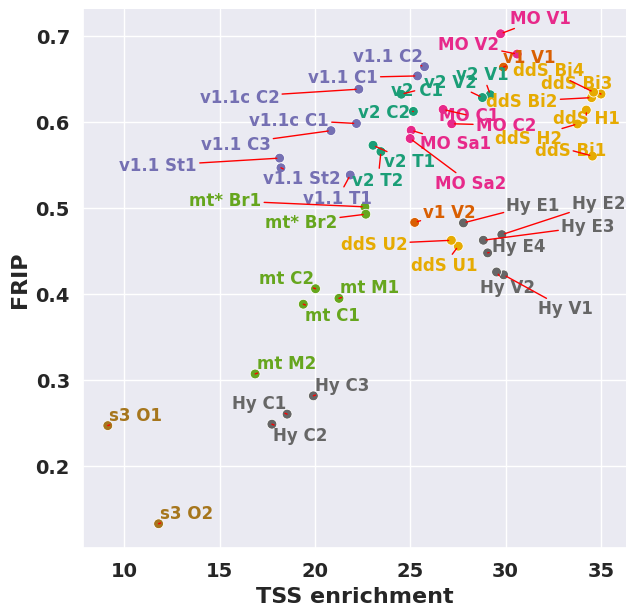

In [56]:
df = df_medians
x_var = "TSS_enrichment"
x_axis_scale = "linear"
y_var = "FRIP"
y_axis_scale = "linear"
color_var = "sample_id_short_alias"

plot_metadata(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    x_axis_scale=x_axis_scale,
    y_axis_scale=y_axis_scale,
    s=50,
    remove_legend=True,
    palette=sample_id_short_alias_palette,
    figsize=(7, 7),
    xlabel="TSS enrichment",
    ylabel="FRIP",
)

texts = [
    plt.text(
        df[x_var].loc[sample],
        df[y_var].loc[sample],
        f"{sample}",
        ha="center",
        va="center",
        color=sample_id_short_alias_palette[sample],
    )
    for sample in df.index
]

sns.despine(right=True, top=True)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))

plt.savefig(
    f"plts_general/all_{x_var}_{y_var}_by_{color_var}.png", dpi=600, facecolor="white"
)
plt.savefig(
    f"plts_general/all_{x_var}_{y_var}_by_{color_var}.svg", dpi=600, facecolor="white"
)

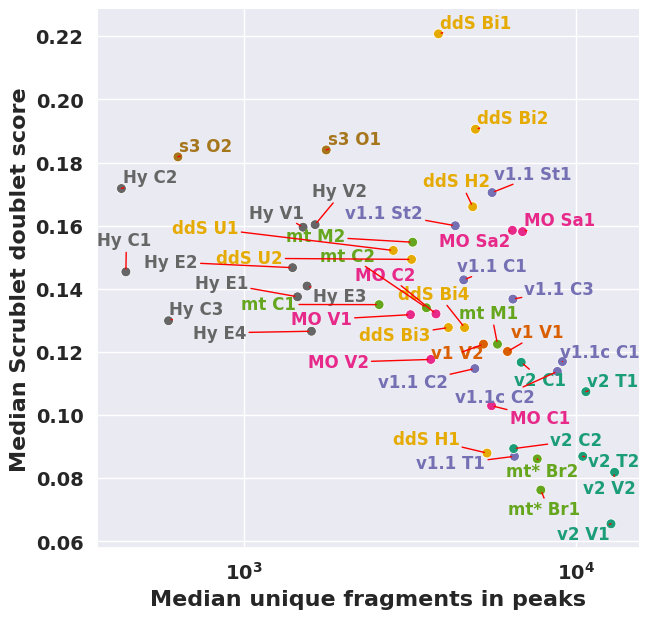

In [57]:
df = df_medians
x_var = "Unique_nr_frag_in_regions"
x_axis_scale = "log"
y_var = "Doublet_scores_fragments"
y_axis_scale = "linear"
color_var = "sample_id_short_alias"

plot_metadata(
    df,
    x_var=x_var,
    y_var=y_var,
    color_var=color_var,
    x_axis_scale=x_axis_scale,
    y_axis_scale=y_axis_scale,
    s=50,
    remove_legend=True,
    palette=sample_id_short_alias_palette,
    figsize=(7, 7),
    xlabel="Median unique fragments in peaks",
    ylabel="Median Scrublet doublet score",
)

texts = [
    plt.text(
        df[x_var].loc[sample],
        df[y_var].loc[sample],
        f"{sample}",
        ha="center",
        va="center",
        color=sample_id_short_alias_palette[sample],
    )
    for sample in df.index
]

sns.despine(right=True, top=True)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))

plt.savefig(
    f"plts_general/all_{x_var}_{y_var}_by_{color_var}.png", dpi=600, facecolor="white"
)
plt.savefig(
    f"plts_general/all_{x_var}_{y_var}_by_{color_var}.svg", dpi=600, facecolor="white"
)

# experiment barplot

In [428]:
cell_data_merged["sample_id"] = [
    x.replace("_11", "_1").replace("12", "1").replace("21", "2").replace("22", "2")
    for x in cell_data_merged["sample_id"]
]

In [429]:
cell_data_merged["sample_id"].unique()

array(['BIO_ddseq_1.FIXEDCELLS', 'BIO_ddseq_2.FIXEDCELLS',
       'BIO_ddseq_3.FIXEDCELLS', 'BIO_ddseq_4.FIXEDCELLS',
       'BRO_mtscatac_1.FIXEDCELLS', 'BRO_mtscatac_2.FIXEDCELLS',
       'CNA_10xmultiome_1.FIXEDCELLS', 'CNA_10xmultiome_2.FIXEDCELLS',
       'CNA_10xv11_1.FIXEDCELLS', 'CNA_10xv11_2.FIXEDCELLS',
       'CNA_10xv11_3.FIXEDCELLS', 'CNA_10xv11_4.FIXEDCELLS',
       'CNA_10xv11_5.FIXEDCELLS', 'CNA_10xv2_1.FIXEDCELLS',
       'CNA_10xv2_2.FIXEDCELLS', 'CNA_hydrop_1.FIXEDCELLS',
       'CNA_hydrop_2.FIXEDCELLS', 'CNA_hydrop_3.FIXEDCELLS',
       'CNA_mtscatac_1.FIXEDCELLS', 'CNA_mtscatac_2.FIXEDCELLS',
       'EPF_hydrop_1.FIXEDCELLS', 'EPF_hydrop_2.FIXEDCELLS',
       'EPF_hydrop_3.FIXEDCELLS', 'EPF_hydrop_4.FIXEDCELLS',
       'HAR_ddseq_1.FIXEDCELLS', 'HAR_ddseq_2.FIXEDCELLS',
       'MDC_mtscatac_1.FIXEDCELLS', 'MDC_mtscatac_2.FIXEDCELLS',
       'OHS_s3atac_1.FIXEDCELLS', 'OHS_s3atac_2.FIXEDCELLS',
       'SAN_10xmultiome_1.FIXEDCELLS', 'SAN_10xmultiome_2.FIXEDCELLS',


In [430]:
df_medians = cell_data_merged.groupby("sample_id").median()

/local_scratch/tmp-vsc33042/ipykernel_383392/1259557083.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_medians = cell_data_merged.groupby("sample_id").median()


In [431]:
df_medians["centre"] = [x.split("_")[0] for x in df_medians.index]

In [432]:
df_medians["tech"] = [x.split("_")[1] for x in df_medians.index]

In [433]:
df_centres = df_medians.groupby("tech")["centre"].value_counts().unstack()

In [434]:
df_centres

centre       BIO  BRO  CNA  EPF  HAR  MDC  OHS  SAN  STA  TXG  UCS  VIB
tech                                                                   
10xmultiome  NaN  NaN  2.0  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  2.0
10xv1        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0
10xv11       NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  2.0  1.0  NaN  NaN
10xv2        NaN  NaN  2.0  NaN  NaN  NaN  NaN  NaN  NaN  2.0  NaN  2.0
ddseq        4.0  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  NaN  2.0  NaN
hydrop       NaN  NaN  3.0  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0
mtscatac     NaN  2.0  2.0  NaN  NaN  2.0  NaN  NaN  NaN  NaN  NaN  NaN
s3atac       NaN  NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  NaN

In [435]:
df_centres = df_centres.loc[
    ["10xv2", "10xv1", "10xv11", "10xmultiome", "mtscatac", "ddseq", "s3atac", "hydrop"]
]

In [436]:
df_centres = df_centres[df_centres.sum().sort_values(ascending=False).index]

In [437]:
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

In [438]:
centre_alias_dict = {
    "BIO": "Bio-Rad",
    "OHS": "OHSU",
    "VIB": "VIB",
    "EPF": "EPFL",
    "CNA": "CNAG",
    "STA": "Stanford",
    "HAR": "Harvard",
    "TXG": "10x Genomics",
    "MDC": "MDC",
    "SAN": "Sanger",
    "BRO": "Broad Institute",
    "UCS": "UCSF",
}

In [439]:
df_centres.index = [tech_alias_dict[x] for x in df_centres.index]

In [440]:
df_centres.columns = [centre_alias_dict[x] for x in df_centres.columns]

<AxesSubplot: >

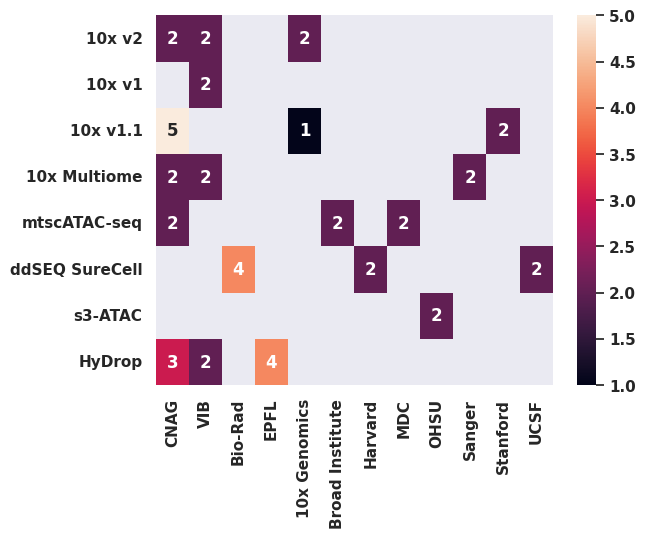

In [441]:
sns.heatmap(df_centres, annot=True)

In [442]:
df_centres = df_centres.T

In [443]:
tech_alias_color_palette

{'10x v2': '#1b9e77',
 '10x v1': '#d95f02',
 '10x v1.1': '#7570b3',
 '10x MO': '#e7298a',
 'mtscATAC-seq': '#66a61e',
 'ddSEQ SureCell': '#e6ab02',
 's3-ATAC': '#a6761d',
 'HyDrop': '#666666'}

In [444]:
list(tech_alias_color_palette.values())

['#1b9e77',
 '#d95f02',
 '#7570b3',
 '#e7298a',
 '#66a61e',
 '#e6ab02',
 '#a6761d',
 '#666666']

In [445]:
import matplotlib as mpl

In [446]:
tech_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "poom", list(tech_alias_color_palette.values())
)

In [447]:
df_centres

10x v2  10x v1  10x v1.1  10x Multiome  mtscATAC-seq  \
CNAG                2.0     NaN       5.0           2.0           2.0   
VIB                 2.0     2.0       NaN           2.0           NaN   
Bio-Rad             NaN     NaN       NaN           NaN           NaN   
EPFL                NaN     NaN       NaN           NaN           NaN   
10x Genomics        2.0     NaN       1.0           NaN           NaN   
Broad Institute     NaN     NaN       NaN           NaN           2.0   
Harvard             NaN     NaN       NaN           NaN           NaN   
MDC                 NaN     NaN       NaN           NaN           2.0   
OHSU                NaN     NaN       NaN           NaN           NaN   
Sanger              NaN     NaN       NaN           2.0           NaN   
Stanford            NaN     NaN       2.0           NaN           NaN   
UCSF                NaN     NaN       NaN           NaN           NaN   

                 ddSEQ SureCell  s3-ATAC  HyDrop  
CNAG                        NaN      NaN     3.0  
VIB                         NaN      NaN     2.0  
Bio-Rad                     4.0      NaN     NaN  
EPFL                        NaN      NaN     4.0  
10x Genomics                NaN      NaN     NaN  
Broad Institute             NaN      NaN     NaN  
Harvard                     2.0      NaN     NaN  
MDC                         NaN      NaN     NaN  
OHSU                        NaN      2.0     NaN  
Sanger                      NaN      NaN     NaN  
Stanford                    NaN      NaN     NaN  
UCSF                        2.0      NaN     NaN

<AxesSubplot: >

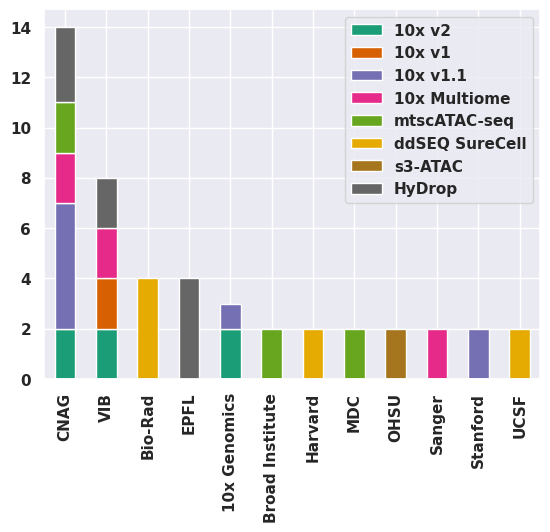

In [448]:
df_centres.plot.bar(stacked=True, colormap=cmap)

In [449]:
cell_type_color_palette = (
    palettable.colorbrewer.qualitative.Paired_12.get_mpl_colormap()
)

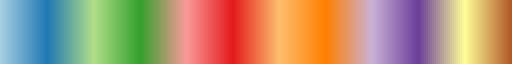

In [450]:
cell_type_color_palette

In [452]:
df_centres

10x v2  10x v1  10x v1.1  10x Multiome  mtscATAC-seq  \
CNAG                2.0     NaN       5.0           2.0           2.0   
VIB                 2.0     2.0       NaN           2.0           NaN   
Bio-Rad             NaN     NaN       NaN           NaN           NaN   
EPFL                NaN     NaN       NaN           NaN           NaN   
10x Genomics        2.0     NaN       1.0           NaN           NaN   
Broad Institute     NaN     NaN       NaN           NaN           2.0   
Harvard             NaN     NaN       NaN           NaN           NaN   
MDC                 NaN     NaN       NaN           NaN           2.0   
OHSU                NaN     NaN       NaN           NaN           NaN   
Sanger              NaN     NaN       NaN           2.0           NaN   
Stanford            NaN     NaN       2.0           NaN           NaN   
UCSF                NaN     NaN       NaN           NaN           NaN   

                 ddSEQ SureCell  s3-ATAC  HyDrop  
CNAG                        NaN      NaN     3.0  
VIB                         NaN      NaN     2.0  
Bio-Rad                     4.0      NaN     NaN  
EPFL                        NaN      NaN     4.0  
10x Genomics                NaN      NaN     NaN  
Broad Institute             NaN      NaN     NaN  
Harvard                     2.0      NaN     NaN  
MDC                         NaN      NaN     NaN  
OHSU                        NaN      2.0     NaN  
Sanger                      NaN      NaN     NaN  
Stanford                    NaN      NaN     NaN  
UCSF                        2.0      NaN     NaN

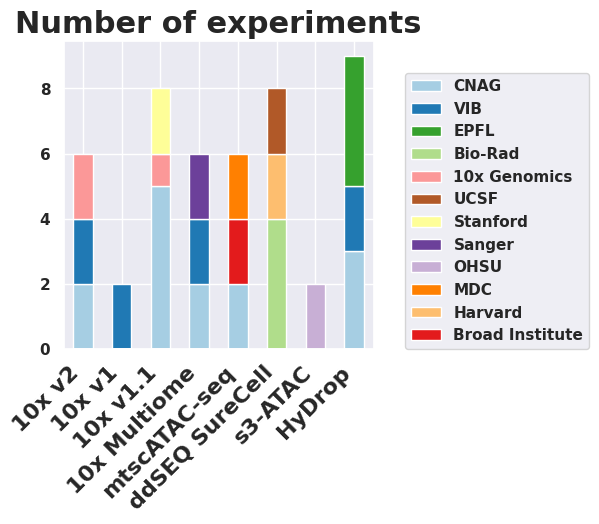

In [456]:
fig, ax = plt.subplots(figsize=(4, 4))
df_centres.T.plot.bar(stacked=True, ax=ax, colormap=cell_type_color_palette)

ax.set_title("Number of experiments", fontsize=22, fontweight="bold")
handles, labels = plt.gca().get_legend_handles_labels()

legend_order = df_centres.sum(axis=1).sort_values(ascending=True).index
legend_order_index = list(reversed([labels.index(x) for x in legend_order]))

plt.legend(
    [handles[i] for i in legend_order_index],
    [labels[i] for i in legend_order_index],
    loc=(1.10, 0),
)
xticklabels = df_centres.columns
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontsize=16)
plt.savefig("plts_general/barplot_experiments.svg", dpi=600)